## Import


In [22]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Question Number 1: Data Exploration of tandem data  
About Dataset:

    Trip Duration (seconds),
    Start Time and Date,
    End Time and Date,
    Start Station ID,
    Start Station Name,
    Start Station Latitude,
    Start Station Longitude,
    End Station ID,
    End Station Name,
    End Station Latitude,
    End Station Longitude,
    Bike ID,
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual),
    Member Year of Birth, Member Gender  




#### a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner  



In [7]:
df_2018_03 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/tandem_data/201803-fordgobike-tripdata.csv')
df_2018_07 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/tandem_data/201807-fordgobike-tripdata.csv')
df_2018_11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/tandem_data/201811-fordgobike-tripdata.csv')
df_2018_12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/tandem_data/201812-fordgobike-tripdata.csv')

In [17]:
df_2018_all = pd.concat([df_2018_03, df_2018_07, df_2018_11, df_2018_12], ignore_index=True)
df_2018_all['start_time'] = pd.to_datetime(df_2018_all['start_time'])
df_2018_all['end_time'] = pd.to_datetime(df_2018_all['end_time'])
df_2018_all.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.149,2018-04-01 12:54:39.263,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.916,2018-04-01 12:26:25.035,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.564,2018-04-01 11:50:14.840,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.658,2018-04-01 11:18:52.613,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.640,2018-04-01 00:04:02.893,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


In [19]:
df_2018_all.shape

(576102, 16)

#### b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)  



Average time of renting bike: 0.042796240943444044


<Figure size 2000x2000 with 0 Axes>

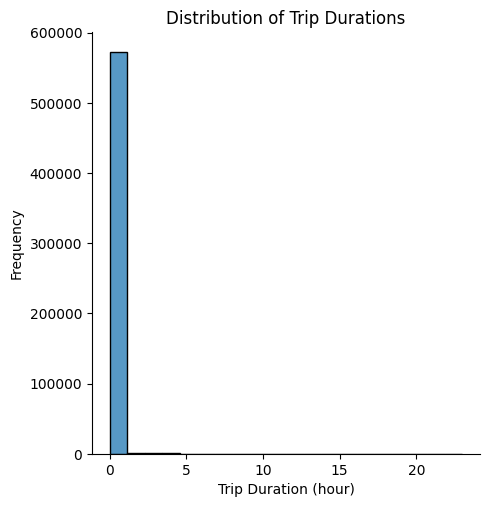

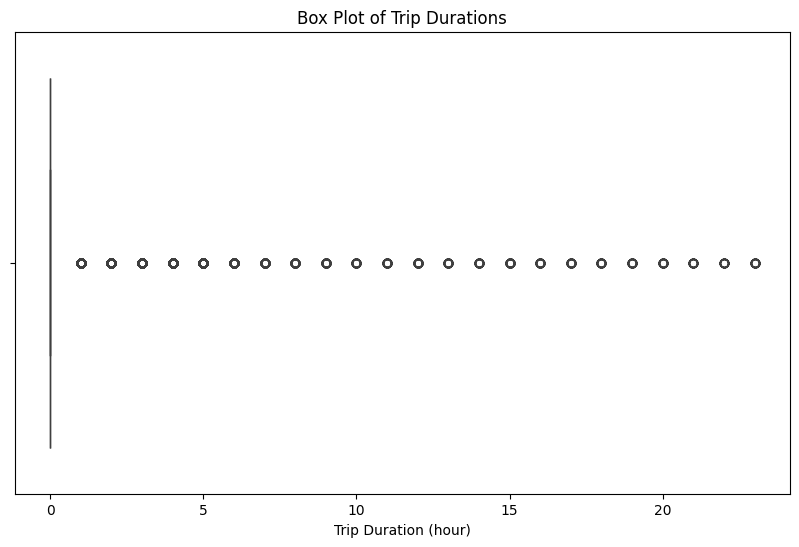

In [44]:
def convert(seconds):
    return int(seconds) // (60*60)

avg_hour_rented = df_2018_all['duration_sec'].apply(convert)

print(f'Average time of renting bike: {avg_hour_rented.mean()}')

# Plotting the distribution plot of trip duration
plt.figure(figsize=(20,20))
sns.displot(avg_hour_rented, bins=20)
plt.title('Distribution of Trip Durations')
plt.xlabel('Trip Duration (hour)')
plt.ylabel('Total rented bikes')
plt.show()

# Plotting the box plot of trip duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=avg_hour_rented)
plt.title('Box Plot of Trip Durations')
plt.xlabel('Trip Duration (hour)')
plt.show()

#### c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot  



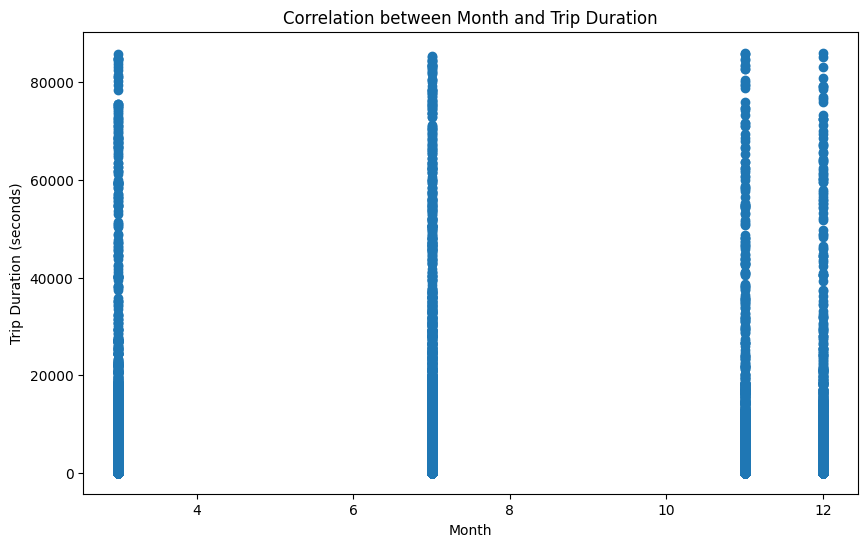

In [58]:
df_2018_all_t = df_2018_all.copy()
df_2018_all_t['month'] = df_2018_all_t['start_time'].dt.month

# Create a scatter plot to visualize the correlation between month and trip duration
plt.figure(figsize=(10, 6))
plt.scatter(df_2018_all_t['month'], df_2018_all_t['duration_sec'])
plt.title('Correlation between Month and Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip Duration (seconds)')
plt.show()


#### d. Do seasons affect the duration of a trip? Comment your observations.  



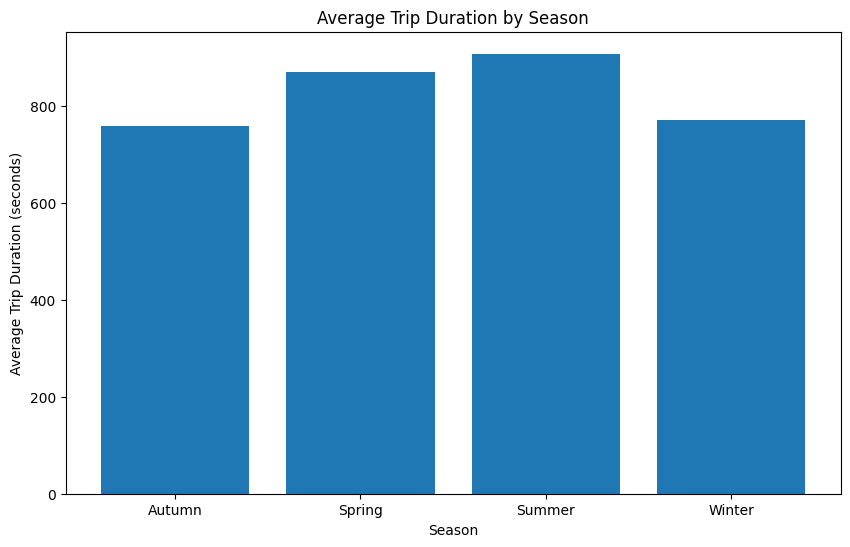

Infulence:  season
Autumn    757.954031
Spring    870.649899
Summer    907.710589
Winter    770.675365
Name: duration_sec, dtype: float64


In [62]:
df_2018_all_t['season'] = (df_2018_all_t['month'] % 12 + 3) // 3

# Map season numbers to season names
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df_2018_all_t['season'] = df_2018_all_t['season'].map(season_mapping)


# Group by season and calculate the average trip duration
average_trip_duration_by_season = df_2018_all_t.groupby('season')['duration_sec'].mean()

# Create a bar plot to visualize the average trip duration by season
plt.figure(figsize=(10, 6))
plt.bar(average_trip_duration_by_season.index, average_trip_duration_by_season.values)
plt.title('Average Trip Duration by Season')
plt.xlabel('Season')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()


print("Infulence: ",average_trip_duration_by_season)

#### e. Using multivariate exploration, explain whether there is any relation between short trips and the users.  


Relationship between short trips and user types using a cross-tabulation:
 short_trip  False   True 
user_type                
Customer    43849   38756
Subscriber  88525  404972


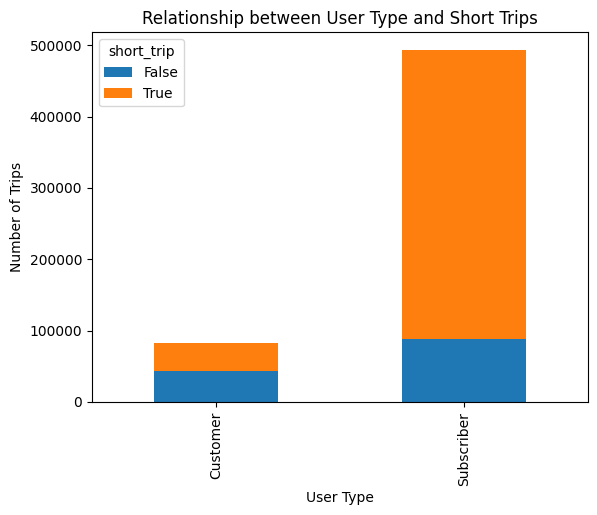

short_trip     False   True 
member_gender               
Female         36948   96884
Male           77798  324349
Other           2081    6546


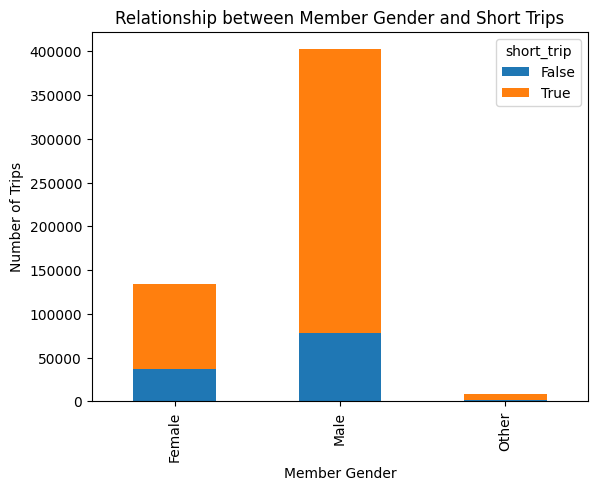

In [65]:
df_2018_all_t = df_2018_all.copy()
df_2018_all_t['duration_min'] = df_2018_all_t['duration_sec'] / 60

# Create a new column to indicate whether a trip is short or not
short_trip_threshold = 15
df_2018_all_t['short_trip'] = df_2018_all_t['duration_min'] < short_trip_threshold

# Explore the relationship between short trips and user types using a cross-tabulation
user_type_short_trip_cross_tab = pd.crosstab(df_2018_all_t['user_type'], df_2018_all_t['short_trip'])
print("Relationship between short trips and user types using a cross-tabulation:\n",user_type_short_trip_cross_tab)

# Visualize the relationship using a stacked bar chart
user_type_short_trip_cross_tab.plot(kind='bar', stacked=True)
plt.title('Relationship between User Type and Short Trips')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

# Explore the relationship between short trips and member gender (if available)
gender_short_trip_cross_tab = pd.crosstab(df_2018_all_t['member_gender'], df_2018_all_t['short_trip'])
print(gender_short_trip_cross_tab)

# Visualize the relationship using a stacked bar chart
gender_short_trip_cross_tab.plot(kind='bar', stacked=True)
plt.title('Relationship between Member Gender and Short Trips')
plt.xlabel('Member Gender')
plt.ylabel('Number of Trips')
plt.show()

## Question Number 2:  

a. Create a Matrix between 0 and 1, with each value difference of 0.01.  

b. Create an array of 20 linearly spaced points between 0 and 1.  

c. Create a 5x5 matrix using range 1 to 26, and return sum of the matrix, standard deviation and sum of all the columns of the matrix.  






In [70]:
mat=np.arange(0,1.01,0.01)


(101,)

## Question Number 3:  

```python
import numpy as np  
x = np.arange(0,100)  
y = x*2  
z = x**2
```

a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide necessary labels and title to the plot.  

b. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]  

c. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]  

d. Use x, y, z array to create the plots  

- Between x and z arrays  

- Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in 30-50  



## Question Number 4:

#### The purchase analysis of Walmart.  

a. What is the average Purchase Price?  

b. What were the highest and lowest purchase prices?  

c. How many people have English 'en' as their Language of choice on the website?  

d. What is the email of the person with the following Credit Card Number: 4926535242672853  

e. Someone made a purchase that came from Lot: "90 WT", what was the Purchase Price for this transaction?  

f. How many people have American Express as their Credit Card Provider and made a purchase above $95?  

g. How many people have a credit card that expires in 2025?  

h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...)?  

i. What are the 5 most common Job Titles?  

j. How many people made the purchase during morning and evening time?  